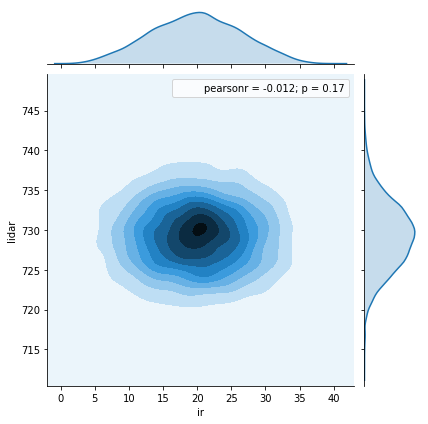

In [1]:
import pandas as pd    ###2dgauss###
import seaborn as sns
import matplotlib.pyplot as plt

data  = pd.read_csv("sensor_data_700.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))

data = data[ (data["time"] < 160000) & (data["time"] >= 120000) ] #12時から16時までのデータだけ抽出

sns.jointplot(data["ir"], data["lidar"], data, kind="kde")
plt.show()

In [11]:
print("光センサの計測値の分散:", data.ir.var()) ###coveach###
print("LiDARの計測値の分散:", data.lidar.var())

diff_ir = data.ir - data.ir.mean()
diff_lidar = data.lidar - data.lidar.mean()
    
a = diff_ir * diff_lidar
print("共分散:", sum(a)/(len(data)-1))

data.mean()

光センサの計測値の分散: 42.1171263677
LiDARの計測値の分散: 17.7020264692
共分散: -0.31677803385436953


date     2.018021e+07
time     1.379727e+05
ir       1.986025e+01
lidar    7.293120e+02
dtype: float64

In [12]:
data.loc[:, ["ir", "lidar"]].cov()  ###covonce###

date     2.018021e+07
time     1.379727e+05
ir       1.986025e+01
lidar    7.293120e+02
dtype: float64

In [27]:
import numpy as np
from scipy.stats import multivariate_normal

mu = np.array([19.9, 729]).T
S = np.array([[42.1, -0.317], [-0.317, 17.7]]) #S: シグマの代わり

irli = multivariate_normal(mean=mu, cov=S)

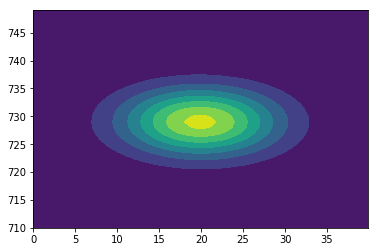

In [30]:
 x, y = np.mgrid[0:40:.1, 710:750:1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
plt.contourf(x, y, irli.pdf(pos))

plt.show()

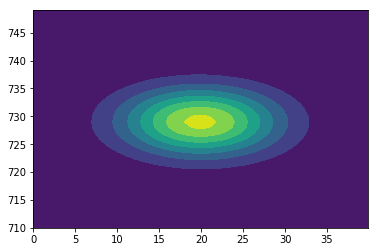